# Entropy e Information Gain
## Fundamentos Teóricos e Aplicações Práticas

---

## Sumário

1. Introdução à Teoria da Informação
2. Conceito de Entropia
3. Cálculo Matemático da Entropia
4. Entropia em Classificação
5. Information Gain (Ganho de Informação)
6. Exemplos Práticos
7. Implementação em Python
8. Aplicação em Árvores de Decisão
9. Exercícios e Casos de Uso

---
## 1. Introdução à Teoria da Informação

A Teoria da Informação foi desenvolvida por Claude Shannon em 1948 e estabelece princípios fundamentais sobre como medir, armazenar e transmitir informação.

### Conceitos Fundamentais

**Informação** pode ser entendida como a redução da incerteza. Quanto mais inesperado um evento, mais informação ele carrega.

**Exemplo Intuitivo:**
- Se alguém diz "o sol nasceu hoje", há pouca informação (evento esperado)
- Se alguém diz "nevou no deserto do Saara", há muita informação (evento inesperado)

### Aplicações em Machine Learning

Em aprendizado de máquina, especialmente em árvores de decisão, usamos esses conceitos para:
- Medir a impureza de um conjunto de dados
- Decidir qual atributo melhor divide os dados
- Construir modelos de classificação eficientes

In [45]:
# Setup inicial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import log2
from collections import Counter

# Configurações
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliotecas importadas com sucesso")

Bibliotecas importadas com sucesso


---
## 2. Conceito de Entropia

### Definição

**Entropia** é uma medida de desordem, incerteza ou impureza em um conjunto de dados.

### Interpretação

- **Alta Entropia**: Alto grau de incerteza/desordem (dados misturados)
- **Baixa Entropia**: Baixo grau de incerteza/desordem (dados homogêneos)
- **Entropia Zero**: Certeza completa (todos os dados são da mesma classe)

### Analogia

Imagine uma caixa com bolas coloridas:

**Cenário 1 - Baixa Entropia:**
- Caixa com 10 bolas vermelhas
- Ao pegar uma bola aleatoriamente, você tem certeza da cor
- Entropia = 0

**Cenário 2 - Alta Entropia:**
- Caixa com 5 bolas vermelhas e 5 bolas azuis
- Ao pegar uma bola, há máxima incerteza sobre a cor
- Entropia = máxima

**Cenário 3 - Entropia Intermediária:**
- Caixa com 9 bolas vermelhas e 1 bola azul
- Há alguma incerteza, mas menor que o cenário 2
- Entropia = intermediária

---
## 3. Cálculo Matemático da Entropia

### Fórmula da Entropia de Shannon

Para um conjunto de dados com classes C₁, C₂, ..., Cₙ:

$H(S) = \sum_{i} \left( p_i \times \log_2(p_i) \right)$

Onde:
- H(S) = Entropia do conjunto S
- pᵢ = proporção de exemplos da classe i
- log₂ = logaritmo na base 2
- Σ = somatório sobre todas as classes

### Propriedades Importantes

1. **Domínio**: 0 ≤ H(S) ≤ log₂(n), onde n é o número de classes
2. **Mínimo**: H(S) = 0 quando todos os exemplos são da mesma classe
3. **Máximo**: H(S) = log₂(n) quando as classes estão uniformemente distribuídas
4. **Unidade**: medida em "bits" quando usamos log₂

In [46]:
def calculate_entropy(labels):
    """
    Calcula a entropia de um conjunto de labels.

    Parameters:
    -----------
    labels : array-like
        Lista ou array com os labels das classes

    Returns:
    --------
    float
        Valor da entropia
    """
    # Contar frequências de cada classe
    total = len(labels)
    if total == 0:
        return 0

    # Contar ocorrências de cada classe
    counts = Counter(labels)

    # Calcular entropia
    entropy = 0
    for count in counts.values():
        probability = count / total
        if probability > 0:  # log(0) não é definido
            entropy -= probability * log2(probability)

    return entropy


# Teste da função
print("Função de entropia implementada")

Função de entropia implementada


---
## 4. Entropia em Classificação

### Exemplo 1: Conjunto Homogêneo (Entropia = 0)

In [47]:
# Exemplo 1: Todos da mesma classe
labels_homogeneous = ['Sim', 'Sim', 'Sim', 'Sim', 'Sim']

entropy_1 = calculate_entropy(labels_homogeneous)

print("Exemplo 1: Conjunto Homogêneo")
print(f"Labels: {labels_homogeneous}")
print(f"Entropia: {entropy_1:.4f} bits")
print(f"\nInterpretação: Entropia zero indica certeza completa")
print("Não há incerteza - todos são da mesma classe")

Exemplo 1: Conjunto Homogêneo
Labels: ['Sim', 'Sim', 'Sim', 'Sim', 'Sim']
Entropia: 0.0000 bits

Interpretação: Entropia zero indica certeza completa
Não há incerteza - todos são da mesma classe


### Exemplo 2: Distribuição Uniforme (Entropia Máxima)

In [48]:
# Exemplo 2: Distribuição 50-50
labels_uniform = ['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não']

entropy_2 = calculate_entropy(labels_uniform)
max_entropy = log2(2)  # log2(número de classes)

print("Exemplo 2: Distribuição Uniforme")
print(f"Labels: {labels_uniform}")
print(f"Proporção Sim: {labels_uniform.count('Sim')/len(labels_uniform)}")
print(f"Proporção Não: {labels_uniform.count('Não')/len(labels_uniform)}")
print(f"Entropia: {entropy_2:.4f} bits")
print(f"Entropia Máxima Teórica: {max_entropy:.4f} bits")
print(f"\nInterpretação: Máxima incerteza - não sabemos qual classe esperar")

Exemplo 2: Distribuição Uniforme
Labels: ['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não']
Proporção Sim: 0.5
Proporção Não: 0.5
Entropia: 1.0000 bits
Entropia Máxima Teórica: 1.0000 bits

Interpretação: Máxima incerteza - não sabemos qual classe esperar


### Exemplo 3: Distribuição Assimétrica

In [49]:
# Exemplo 3: Distribuição 70-30
labels_asymmetric = ['Sim', 'Sim', 'Sim', 'Sim',
                     'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não']

entropy_3 = calculate_entropy(labels_asymmetric)

print("Exemplo 3: Distribuição Assimétrica")
print(f"Labels: {labels_asymmetric}")
print(
    f"Proporção Sim: {labels_asymmetric.count('Sim')/len(labels_asymmetric)}")
print(
    f"Proporção Não: {labels_asymmetric.count('Não')/len(labels_asymmetric)}")
print(f"Entropia: {entropy_3:.4f} bits")
print(f"\nInterpretação: Incerteza intermediária")
print("Há predominância de 'Sim', mas ainda existe alguma incerteza")

Exemplo 3: Distribuição Assimétrica
Labels: ['Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não']
Proporção Sim: 0.7
Proporção Não: 0.3
Entropia: 0.8813 bits

Interpretação: Incerteza intermediária
Há predominância de 'Sim', mas ainda existe alguma incerteza


### Visualização: Entropia vs Proporção

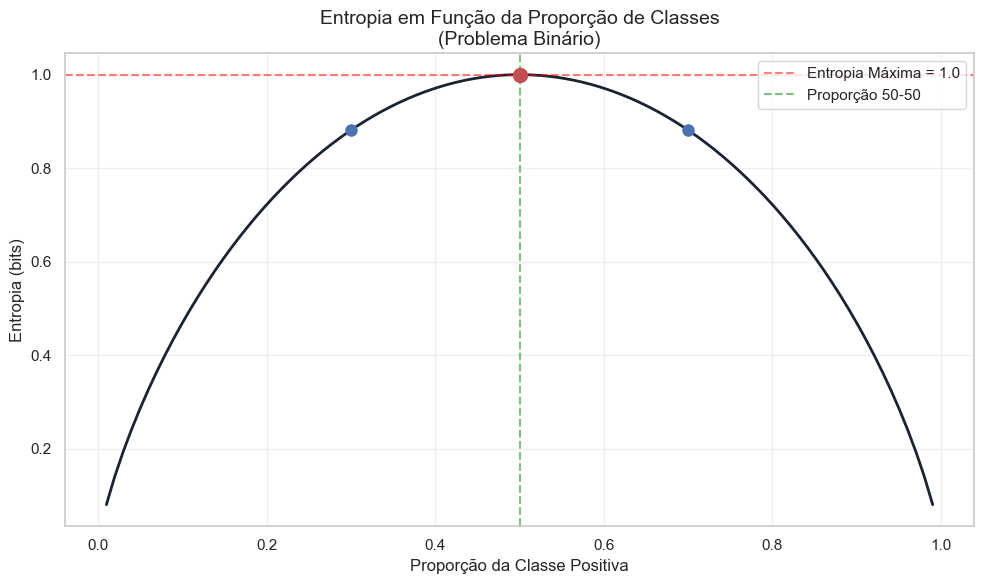


Observações:
1. Entropia é máxima quando as classes estão balanceadas (50-50)
2. Entropia é simétrica em torno de p=0.5
3. Entropia diminui quando uma classe domina


In [50]:
# Visualizar como a entropia varia com a proporção de classes
def plot_entropy_curve():
    proportions = np.linspace(0.01, 0.99, 100)
    entropies = []

    for p in proportions:
        # Calcular entropia para proporção p de uma classe e (1-p) da outra
        entropy = -p * log2(p) - (1-p) * log2(1-p)
        entropies.append(entropy)

    plt.figure(figsize=(10, 6))
    plt.plot(proportions, entropies, linewidth=2, color='#1A2332')
    plt.axhline(y=1.0, color='red', linestyle='--',
                alpha=0.5, label='Entropia Máxima = 1.0')
    plt.axvline(x=0.5, color='green', linestyle='--',
                alpha=0.5, label='Proporção 50-50')

    plt.xlabel('Proporção da Classe Positiva', fontsize=12)
    plt.ylabel('Entropia (bits)', fontsize=12)
    plt.title(
        'Entropia em Função da Proporção de Classes\n(Problema Binário)', fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend()

    # Marcar pontos importantes
    plt.plot(0.5, 1.0, 'ro', markersize=10, label='Máximo')
    plt.plot([0.3, 0.7], [calculate_entropy(['A']*3 + ['B']*7),
                          calculate_entropy(['A']*7 + ['B']*3)],
             'bo', markersize=8, label='Exemplos')

    plt.tight_layout()
    plt.show()


plot_entropy_curve()

print("\nObservações:")
print("1. Entropia é máxima quando as classes estão balanceadas (50-50)")
print("2. Entropia é simétrica em torno de p=0.5")
print("3. Entropia diminui quando uma classe domina")

---
## 5. Information Gain (Ganho de Informação)

### Definição

**Information Gain** mede a redução de entropia obtida ao dividir um conjunto de dados com base em um atributo.

### Fórmula

$$
IG(t) =
- \sum_{i=1}^{m} p(c_i)\log p(c_i)
+ p(t)\sum_{i=1}^{m} p(c_i \mid t)\log p(c_i \mid t)
+ p(\bar{t})\sum_{i=1}^{m} p(c_i \mid \bar{t})\log p(c_i \mid \bar{t})
$$

Onde:

- $c_i$ representa a *i*-ésima categoria, e $P(c_i)$ é a probabilidade da *i*-ésima categoria.

- $P(t)$ e $P(\bar{t})$ são as probabilidades de que o termo $t$ apareça ou não apareça nos documentos.

- $P(c_i \mid t)$ é a probabilidade condicional da *i*-ésima categoria dado que o termo $t$ apareceu, e  
- $P(c_i \mid \bar{t})$ é a probabilidade condicional da *i*-ésima categoria dado que o termo $t$ não apareceu.

### Interpretação

- **Alto Information Gain**: O atributo é muito informativo (boa divisão)
- **Baixo Information Gain**: O atributo é pouco informativo (divisão ruim)
- **Information Gain = 0**: O atributo não fornece nenhuma informação

### Conceito Intuitivo

Information Gain responde à pergunta: "Quanto de incerteza conseguimos eliminar ao conhecer o valor deste atributo?"






In [51]:
def calculate_information_gain(data, attribute, target):
    """
    Calcula o Information Gain de um atributo.

    Parameters:
    -----------
    data : DataFrame
        Dataset completo
    attribute : str
        Nome da coluna do atributo
    target : str
        Nome da coluna target (classe)

    Returns:
    --------
    float
        Valor do Information Gain
    """
    # Entropia do conjunto original
    original_entropy = calculate_entropy(data[target])

    # Valores únicos do atributo
    values = data[attribute].unique()

    # Calcular entropia ponderada após a divisão
    weighted_entropy = 0
    total_samples = len(data)

    for value in values:
        # Subconjunto com este valor
        subset = data[data[attribute] == value]
        weight = len(subset) / total_samples
        subset_entropy = calculate_entropy(subset[target])
        weighted_entropy += weight * subset_entropy

    # Information Gain = Entropia original - Entropia ponderada
    information_gain = original_entropy - weighted_entropy

    return information_gain, original_entropy, weighted_entropy


print("Função de Information Gain implementada")

Função de Information Gain implementada


---
## 6. Exemplos Práticos

### Exemplo Clássico: Jogar Tênis

Vamos criar um dataset sobre a decisão de jogar tênis baseado em condições climáticas.

**Atributos:**
- Tempo (Ensolarado, Nublado, Chuvoso)
- Temperatura (Quente, Amena, Fria)
- Umidade (Alta, Normal)
- Vento (Fraco, Forte)

**Target:**
- Jogar (Sim, Não)

In [52]:
# Criar dataset de exemplo
data = pd.DataFrame({
    'Tempo': ['Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso',
              'Chuvoso', 'Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso',
              'Ensolarado', 'Nublado', 'Nublado', 'Chuvoso'],
    'Temperatura': ['Quente', 'Quente', 'Quente', 'Amena', 'Fria',
                    'Fria', 'Fria', 'Amena', 'Fria', 'Amena',
                    'Amena', 'Amena', 'Quente', 'Amena'],
    'Umidade': ['Alta', 'Alta', 'Alta', 'Alta', 'Normal',
                'Normal', 'Normal', 'Alta', 'Normal', 'Normal',
                'Normal', 'Alta', 'Normal', 'Alta'],
    'Vento': ['Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco',
              'Forte', 'Forte', 'Fraco', 'Fraco', 'Fraco',
              'Forte', 'Forte', 'Fraco', 'Forte'],
    'Jogar': ['Não', 'Não', 'Sim', 'Sim', 'Sim',
              'Não', 'Sim', 'Não', 'Sim', 'Sim',
              'Sim', 'Sim', 'Sim', 'Não']
})

print("Dataset: Decisão de Jogar Tênis")
print(f"Total de exemplos: {len(data)}")
print("\nPrimeiras linhas:")
print(data.head(10))

Dataset: Decisão de Jogar Tênis
Total de exemplos: 14

Primeiras linhas:
        Tempo Temperatura Umidade  Vento Jogar
0  Ensolarado      Quente    Alta  Fraco   Não
1  Ensolarado      Quente    Alta  Forte   Não
2     Nublado      Quente    Alta  Fraco   Sim
3     Chuvoso       Amena    Alta  Fraco   Sim
4     Chuvoso        Fria  Normal  Fraco   Sim
5     Chuvoso        Fria  Normal  Forte   Não
6     Nublado        Fria  Normal  Forte   Sim
7  Ensolarado       Amena    Alta  Fraco   Não
8  Ensolarado        Fria  Normal  Fraco   Sim
9     Chuvoso       Amena  Normal  Fraco   Sim


In [53]:
# Análise exploratória
print("\nDistribuição da variável target:")
print(data['Jogar'].value_counts())
print(f"\nProporção:")
print(data['Jogar'].value_counts(normalize=True))


Distribuição da variável target:
Jogar
Sim    9
Não    5
Name: count, dtype: int64

Proporção:
Jogar
Sim    0.642857
Não    0.357143
Name: proportion, dtype: float64


### Calculando a Entropia Inicial

In [54]:
# Entropia do conjunto completo
initial_entropy = calculate_entropy(data['Jogar'])

print("ENTROPIA INICIAL DO DATASET")
print("="*50)
print(f"Total de exemplos: {len(data)}")
print(f"Exemplos 'Sim': {(data['Jogar'] == 'Sim').sum()}")
print(f"Exemplos 'Não': {(data['Jogar'] == 'Não').sum()}")
print(f"\nEntropia: {initial_entropy:.4f} bits")
print("\nInterpretação:")
print(
    f"A entropia de {initial_entropy:.4f} indica que há incerteza significativa")
print("no dataset. Precisamos dividir os dados para reduzir essa incerteza.")

ENTROPIA INICIAL DO DATASET
Total de exemplos: 14
Exemplos 'Sim': 9
Exemplos 'Não': 5

Entropia: 0.9403 bits

Interpretação:
A entropia de 0.9403 indica que há incerteza significativa
no dataset. Precisamos dividir os dados para reduzir essa incerteza.


### Calculando Information Gain para Cada Atributo

In [55]:
# Calcular Information Gain para todos os atributos
attributes = ['Tempo', 'Temperatura', 'Umidade', 'Vento']
results = []

print("INFORMATION GAIN POR ATRIBUTO")
print("="*70)

for attr in attributes:
    ig, original_ent, weighted_ent = calculate_information_gain(
        data, attr, 'Jogar')
    results.append({
        'Atributo': attr,
        'Information Gain': ig,
        'Entropia Original': original_ent,
        'Entropia Ponderada': weighted_ent
    })

    print(f"\nAtributo: {attr}")
    print(f"  Entropia Original: {original_ent:.4f}")
    print(f"  Entropia Ponderada: {weighted_ent:.4f}")
    print(f"  Information Gain: {ig:.4f}")

# Criar DataFrame com resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Information Gain', ascending=False)

print("\n" + "="*70)
print("\nRESUMO ORDENADO POR INFORMATION GAIN:")
print(results_df.to_string(index=False))

INFORMATION GAIN POR ATRIBUTO

Atributo: Tempo
  Entropia Original: 0.9403
  Entropia Ponderada: 0.6935
  Information Gain: 0.2467

Atributo: Temperatura
  Entropia Original: 0.9403
  Entropia Ponderada: 0.9111
  Information Gain: 0.0292

Atributo: Umidade
  Entropia Original: 0.9403
  Entropia Ponderada: 0.7885
  Information Gain: 0.1518

Atributo: Vento
  Entropia Original: 0.9403
  Entropia Ponderada: 0.8922
  Information Gain: 0.0481


RESUMO ORDENADO POR INFORMATION GAIN:
   Atributo  Information Gain  Entropia Original  Entropia Ponderada
      Tempo          0.246750           0.940286            0.693536
    Umidade          0.151836           0.940286            0.788450
      Vento          0.048127           0.940286            0.892159
Temperatura          0.029223           0.940286            0.911063


### Análise Detalhada do Melhor Atributo

In [56]:
# Analisar o melhor atributo em detalhes
best_attribute = results_df.iloc[0]['Atributo']

print(f"ANÁLISE DETALHADA: {best_attribute}")
print("="*70)

# Para cada valor do atributo
for value in data[best_attribute].unique():
    subset = data[data[best_attribute] == value]
    subset_entropy = calculate_entropy(subset['Jogar'])

    print(f"\n{best_attribute} = {value}")
    print(f"  Total de exemplos: {len(subset)}")
    print(f"  Distribuição:")
    print(f"    Sim: {(subset['Jogar'] == 'Sim').sum()}")
    print(f"    Não: {(subset['Jogar'] == 'Não').sum()}")
    print(f"  Entropia: {subset_entropy:.4f}")

    if subset_entropy == 0:
        print(f"  Status: PURO (todos da mesma classe)")
    else:
        print(f"  Status: MISTO (ainda há incerteza)")

ANÁLISE DETALHADA: Tempo

Tempo = Ensolarado
  Total de exemplos: 5
  Distribuição:
    Sim: 2
    Não: 3
  Entropia: 0.9710
  Status: MISTO (ainda há incerteza)

Tempo = Nublado
  Total de exemplos: 4
  Distribuição:
    Sim: 4
    Não: 0
  Entropia: 0.0000
  Status: PURO (todos da mesma classe)

Tempo = Chuvoso
  Total de exemplos: 5
  Distribuição:
    Sim: 3
    Não: 2
  Entropia: 0.9710
  Status: MISTO (ainda há incerteza)


### Visualização dos Resultados

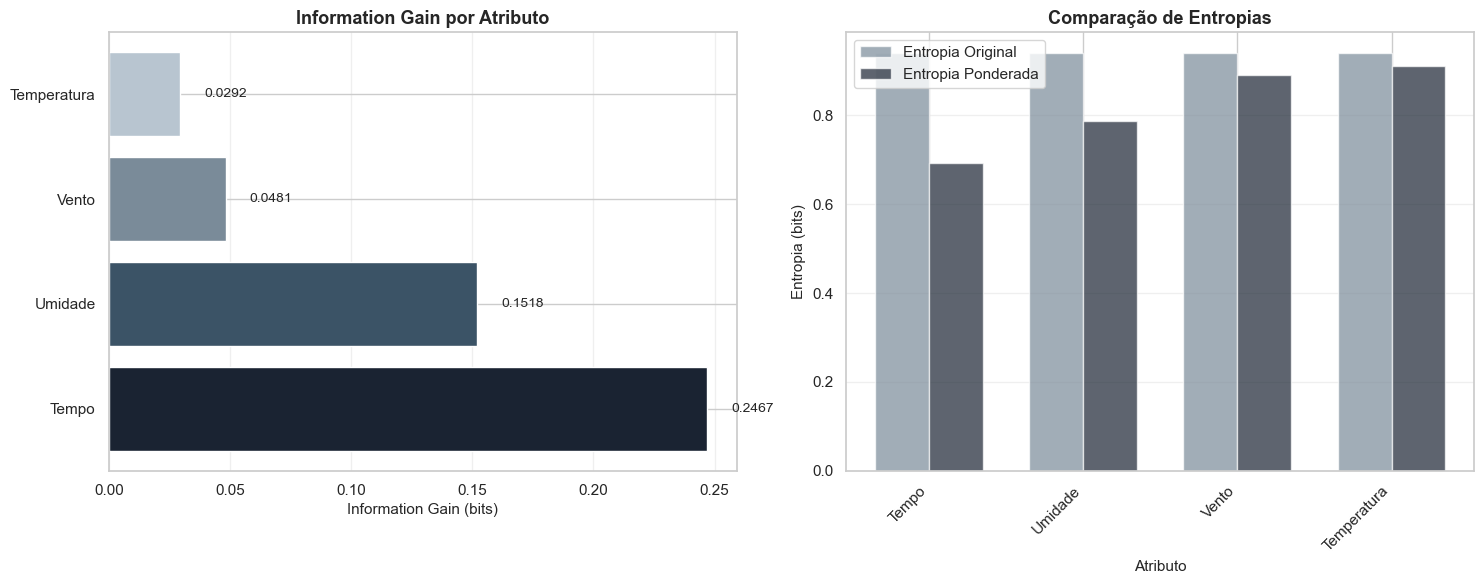


Interpretação dos Gráficos:
1. Quanto maior o Information Gain, melhor o atributo para dividir os dados
2. A diferença entre Entropia Original e Ponderada representa o ganho


In [57]:
# Visualizar Information Gain
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Information Gain por atributo
axes[0].barh(results_df['Atributo'], results_df['Information Gain'],
             color=['#1A2332', '#3B5366', '#7A8B99', '#B8C5D0'])
axes[0].set_xlabel('Information Gain (bits)', fontsize=11)
axes[0].set_title('Information Gain por Atributo',
                  fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, (attr, ig) in enumerate(zip(results_df['Atributo'], results_df['Information Gain'])):
    axes[0].text(ig + 0.01, i, f'{ig:.4f}', va='center', fontsize=10)

# Gráfico 2: Comparação de entropias
x = np.arange(len(results_df))
width = 0.35

axes[1].bar(x - width/2, results_df['Entropia Original'], width,
            label='Entropia Original', color='#7A8B99', alpha=0.7)
axes[1].bar(x + width/2, results_df['Entropia Ponderada'], width,
            label='Entropia Ponderada', color='#1A2332', alpha=0.7)

axes[1].set_xlabel('Atributo', fontsize=11)
axes[1].set_ylabel('Entropia (bits)', fontsize=11)
axes[1].set_title('Comparação de Entropias', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results_df['Atributo'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretação dos Gráficos:")
print("1. Quanto maior o Information Gain, melhor o atributo para dividir os dados")
print("2. A diferença entre Entropia Original e Ponderada representa o ganho")

---
## 7. Implementação Completa

### Classe para Análise de Information Gain

In [58]:
class InformationGainAnalyzer:
    """
    Classe para análise completa de Entropia e Information Gain.
    """

    def __init__(self, data, target_column):
        """
        Inicializa o analisador.

        Parameters:
        -----------
        data : DataFrame
            Dataset para análise
        target_column : str
            Nome da coluna target
        """
        self.data = data
        self.target = target_column
        self.initial_entropy = self._calculate_entropy(data[target_column])

    def _calculate_entropy(self, labels):
        """Calcula entropia de um conjunto de labels."""
        total = len(labels)
        if total == 0:
            return 0

        counts = Counter(labels)
        entropy = 0

        for count in counts.values():
            probability = count / total
            if probability > 0:
                entropy -= probability * log2(probability)

        return entropy

    def calculate_information_gain(self, attribute):
        """
        Calcula Information Gain para um atributo.

        Parameters:
        -----------
        attribute : str
            Nome do atributo

        Returns:
        --------
        dict
            Dicionário com métricas detalhadas
        """
        values = self.data[attribute].unique()
        weighted_entropy = 0
        total_samples = len(self.data)

        split_info = []

        for value in values:
            subset = self.data[self.data[attribute] == value]
            weight = len(subset) / total_samples
            subset_entropy = self._calculate_entropy(subset[self.target])
            weighted_entropy += weight * subset_entropy

            split_info.append({
                'value': value,
                'count': len(subset),
                'weight': weight,
                'entropy': subset_entropy
            })

        information_gain = self.initial_entropy - weighted_entropy

        return {
            'attribute': attribute,
            'information_gain': information_gain,
            'initial_entropy': self.initial_entropy,
            'weighted_entropy': weighted_entropy,
            'split_info': split_info
        }

    def analyze_all_attributes(self, exclude_columns=None):
        """
        Analisa todos os atributos do dataset.

        Parameters:
        -----------
        exclude_columns : list
            Colunas a serem excluídas da análise

        Returns:
        --------
        DataFrame
            Resultados ordenados por Information Gain
        """
        if exclude_columns is None:
            exclude_columns = [self.target]
        else:
            exclude_columns.append(self.target)

        attributes = [
            col for col in self.data.columns if col not in exclude_columns]
        results = []

        for attr in attributes:
            result = self.calculate_information_gain(attr)
            results.append({
                'Attribute': result['attribute'],
                'Information Gain': result['information_gain'],
                'Initial Entropy': result['initial_entropy'],
                'Weighted Entropy': result['weighted_entropy'],
                'Reduction (%)': (result['information_gain'] / result['initial_entropy'] * 100)
            })

        results_df = pd.DataFrame(results)
        results_df = results_df.sort_values(
            'Information Gain', ascending=False)

        return results_df

    def print_detailed_analysis(self, attribute):
        """
        Imprime análise detalhada de um atributo.

        Parameters:
        -----------
        attribute : str
            Nome do atributo a ser analisado
        """
        result = self.calculate_information_gain(attribute)

        print(f"\nANÁLISE DETALHADA: {attribute}")
        print("="*70)
        print(f"Entropia Inicial: {result['initial_entropy']:.4f} bits")
        print(f"Entropia Ponderada: {result['weighted_entropy']:.4f} bits")
        print(f"Information Gain: {result['information_gain']:.4f} bits")
        print(
            f"Redução de Entropia: {(result['information_gain']/result['initial_entropy']*100):.2f}%")

        print(f"\nDivisão por valores de {attribute}:")
        print("-"*70)

        for split in result['split_info']:
            print(f"\n{attribute} = {split['value']}")
            print(
                f"  Exemplos: {split['count']} ({split['weight']*100:.1f}% do total)")
            print(f"  Entropia: {split['entropy']:.4f} bits")

            subset = self.data[self.data[attribute] == split['value']]
            target_dist = subset[self.target].value_counts()
            print(f"  Distribuição do target:")
            for target_val, count in target_dist.items():
                print(
                    f"    {target_val}: {count} ({count/len(subset)*100:.1f}%)")


# Criar analisador
analyzer = InformationGainAnalyzer(data, 'Jogar')

print("Classe InformationGainAnalyzer criada com sucesso")

Classe InformationGainAnalyzer criada com sucesso


In [59]:
# Usar o analisador
results = analyzer.analyze_all_attributes()

print("\nRESULTADOS DA ANÁLISE:")
print(results.to_string(index=False))


RESULTADOS DA ANÁLISE:
  Attribute  Information Gain  Initial Entropy  Weighted Entropy  Reduction (%)
      Tempo          0.246750         0.940286          0.693536      26.241998
    Umidade          0.151836         0.940286          0.788450      16.147801
      Vento          0.048127         0.940286          0.892159       5.118340
Temperatura          0.029223         0.940286          0.911063       3.107838


In [60]:
# Análise detalhada do melhor atributo
best_attr = results.iloc[0]['Attribute']
analyzer.print_detailed_analysis(best_attr)


ANÁLISE DETALHADA: Tempo
Entropia Inicial: 0.9403 bits
Entropia Ponderada: 0.6935 bits
Information Gain: 0.2467 bits
Redução de Entropia: 26.24%

Divisão por valores de Tempo:
----------------------------------------------------------------------

Tempo = Ensolarado
  Exemplos: 5 (35.7% do total)
  Entropia: 0.9710 bits
  Distribuição do target:
    Não: 3 (60.0%)
    Sim: 2 (40.0%)

Tempo = Nublado
  Exemplos: 4 (28.6% do total)
  Entropia: 0.0000 bits
  Distribuição do target:
    Sim: 4 (100.0%)

Tempo = Chuvoso
  Exemplos: 5 (35.7% do total)
  Entropia: 0.9710 bits
  Distribuição do target:
    Sim: 3 (60.0%)
    Não: 2 (40.0%)


---
## 8. Aplicação em Árvores de Decisão

### Como Information Gain é Usado

As árvores de decisão usam Information Gain para:

1. **Seleção de Atributo**: Escolher qual atributo usar em cada nó
2. **Critério de Divisão**: Decidir como dividir os dados
3. **Construção Recursiva**: Repetir o processo para cada subconjunto

### Algoritmo ID3 (Iterative Dichotomiser 3)

Passos básicos:
1. Calcular entropia do conjunto atual
2. Para cada atributo, calcular Information Gain
3. Escolher atributo com maior Information Gain
4. Dividir dataset baseado nesse atributo
5. Recursivamente construir subárvores
6. Parar quando entropia = 0 ou não há mais atributos

In [61]:
class SimpleDecisionTree:
    """
    Implementação simplificada de árvore de decisão usando Information Gain.
    """

    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def _calculate_entropy(self, labels):
        """Calcula entropia."""
        total = len(labels)
        if total == 0:
            return 0
        counts = Counter(labels)
        entropy = 0
        for count in counts.values():
            p = count / total
            if p > 0:
                entropy -= p * log2(p)
        return entropy

    def _information_gain(self, data, attribute, target):
        """Calcula Information Gain."""
        original_entropy = self._calculate_entropy(data[target])
        values = data[attribute].unique()
        weighted_entropy = 0

        for value in values:
            subset = data[data[attribute] == value]
            weight = len(subset) / len(data)
            weighted_entropy += weight * \
                self._calculate_entropy(subset[target])

        return original_entropy - weighted_entropy

    def _find_best_attribute(self, data, attributes, target):
        """Encontra o melhor atributo para dividir."""
        best_gain = -1
        best_attribute = None

        for attr in attributes:
            gain = self._information_gain(data, attr, target)
            if gain > best_gain:
                best_gain = gain
                best_attribute = attr

        return best_attribute, best_gain

    def _build_tree(self, data, attributes, target, depth=0):
        """Constrói a árvore recursivamente."""
        # Caso base 1: Se todos são da mesma classe
        if len(data[target].unique()) == 1:
            return {'class': data[target].iloc[0], 'samples': len(data)}

        # Caso base 2: Sem mais atributos ou profundidade máxima
        if len(attributes) == 0 or (self.max_depth and depth >= self.max_depth):
            majority_class = data[target].mode()[0]
            return {'class': majority_class, 'samples': len(data)}

        # Encontrar melhor atributo
        best_attr, best_gain = self._find_best_attribute(
            data, attributes, target)

        if best_gain == 0:
            majority_class = data[target].mode()[0]
            return {'class': majority_class, 'samples': len(data)}

        # Criar nó
        tree = {
            'attribute': best_attr,
            'information_gain': best_gain,
            'samples': len(data),
            'entropy': self._calculate_entropy(data[target]),
            'children': {}
        }

        # Dividir dados e construir subárvores
        remaining_attributes = [a for a in attributes if a != best_attr]

        for value in data[best_attr].unique():
            subset = data[data[best_attr] == value]
            tree['children'][value] = self._build_tree(
                subset, remaining_attributes, target, depth + 1
            )

        return tree

    def fit(self, data, target):
        """Treina a árvore."""
        attributes = [col for col in data.columns if col != target]
        self.tree = self._build_tree(data, attributes, target)
        return self

    def print_tree(self, tree=None, indent=""):
        """Imprime a árvore de forma legível."""
        if tree is None:
            tree = self.tree

        if 'class' in tree:
            print(
                f"{indent}→ Classe: {tree['class']} (samples: {tree['samples']})")
            return

        print(f"{indent}[{tree['attribute']}]")
        print(f"{indent}  IG: {tree['information_gain']:.4f}, ")
        print(f"{indent}  Entropy: {tree['entropy']:.4f}, ")
        print(f"{indent}  Samples: {tree['samples']}")

        for value, subtree in tree['children'].items():
            print(f"{indent}  se {tree['attribute']} = {value}:")
            self.print_tree(subtree, indent + "    ")


# Criar e treinar árvore
dt = SimpleDecisionTree(max_depth=3)
dt.fit(data, 'Jogar')

print("ÁRVORE DE DECISÃO CONSTRUÍDA:")
print("="*70)
dt.print_tree()

ÁRVORE DE DECISÃO CONSTRUÍDA:
[Tempo]
  IG: 0.2467, 
  Entropy: 0.9403, 
  Samples: 14
  se Tempo = Ensolarado:
    [Umidade]
      IG: 0.9710, 
      Entropy: 0.9710, 
      Samples: 5
      se Umidade = Alta:
        → Classe: Não (samples: 3)
      se Umidade = Normal:
        → Classe: Sim (samples: 2)
  se Tempo = Nublado:
    → Classe: Sim (samples: 4)
  se Tempo = Chuvoso:
    [Vento]
      IG: 0.9710, 
      Entropy: 0.9710, 
      Samples: 5
      se Vento = Fraco:
        → Classe: Sim (samples: 3)
      se Vento = Forte:
        → Classe: Não (samples: 2)


### Interpretação da Árvore

A árvore mostra:
1. **Nó Raiz**: Atributo com maior Information Gain
2. **Ramificações**: Divisões baseadas nos valores do atributo
3. **Folhas**: Classificações finais (classes puras ou majoritárias)
4. **Information Gain em cada nó**: Quanto de incerteza foi eliminada

---
## 9. Exercícios e Casos de Uso

### Exercício 1: Classificação de Clientes

In [62]:
# Criar dataset de exemplo: Aprovação de Crédito
credit_data = pd.DataFrame({
    'Renda': ['Baixa', 'Baixa', 'Média', 'Média', 'Alta', 'Alta',
              'Baixa', 'Média', 'Alta', 'Média'],
    'Histórico': ['Bom', 'Ruim', 'Bom', 'Bom', 'Bom', 'Ruim',
                  'Bom', 'Ruim', 'Bom', 'Bom'],
    'Dívida': ['Alta', 'Alta', 'Baixa', 'Baixa', 'Baixa', 'Alta',
               'Baixa', 'Alta', 'Baixa', 'Baixa'],
    'Garantia': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não',
                 'Sim', 'Não', 'Sim', 'Sim'],
    'Aprovado': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não',
                 'Sim', 'Não', 'Sim', 'Sim']
})

print("EXERCÍCIO 1: Aprovação de Crédito")
print("="*70)
print(credit_data)

# Analisar
credit_analyzer = InformationGainAnalyzer(credit_data, 'Aprovado')
credit_results = credit_analyzer.analyze_all_attributes()

print("\nResultados da Análise:")
print(credit_results.to_string(index=False))

EXERCÍCIO 1: Aprovação de Crédito
   Renda Histórico Dívida Garantia Aprovado
0  Baixa       Bom   Alta      Não      Não
1  Baixa      Ruim   Alta      Não      Não
2  Média       Bom  Baixa      Sim      Sim
3  Média       Bom  Baixa      Sim      Sim
4   Alta       Bom  Baixa      Sim      Sim
5   Alta      Ruim   Alta      Não      Não
6  Baixa       Bom  Baixa      Sim      Sim
7  Média      Ruim   Alta      Não      Não
8   Alta       Bom  Baixa      Sim      Sim
9  Média       Bom  Baixa      Sim      Sim

Resultados da Análise:
Attribute  Information Gain  Initial Entropy  Weighted Entropy  Reduction (%)
   Dívida          0.970951         0.970951          0.000000     100.000000
 Garantia          0.970951         0.970951          0.000000     100.000000
Histórico          0.556780         0.970951          0.414171      57.343767
    Renda          0.095462         0.970951          0.875489       9.831792


In [63]:
# Análise detalhada do melhor atributo
best_credit_attr = credit_results.iloc[0]['Attribute']
credit_analyzer.print_detailed_analysis(best_credit_attr)


ANÁLISE DETALHADA: Dívida
Entropia Inicial: 0.9710 bits
Entropia Ponderada: 0.0000 bits
Information Gain: 0.9710 bits
Redução de Entropia: 100.00%

Divisão por valores de Dívida:
----------------------------------------------------------------------

Dívida = Alta
  Exemplos: 4 (40.0% do total)
  Entropia: 0.0000 bits
  Distribuição do target:
    Não: 4 (100.0%)

Dívida = Baixa
  Exemplos: 6 (60.0% do total)
  Entropia: 0.0000 bits
  Distribuição do target:
    Sim: 6 (100.0%)


### Exercício 2: Diagnóstico Médico

In [64]:
# Dataset médico simplificado
medical_data = pd.DataFrame({
    'Febre': ['Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim'],
    'Tosse': ['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Não'],
    'Dor_Garganta': ['Sim', 'Sim', 'Não', 'Não', 'Sim', 'Sim', 'Não', 'Sim'],
    'Fadiga': ['Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Não'],
    'Diagnóstico': ['Gripe', 'Gripe', 'Saudável', 'Gripe', 'Saudável',
                    'Gripe', 'Saudável', 'Resfriado']
})

print("\nEXERCÍCIO 2: Diagnóstico Médico")
print("="*70)
print(medical_data)

medical_analyzer = InformationGainAnalyzer(medical_data, 'Diagnóstico')
medical_results = medical_analyzer.analyze_all_attributes()

print("\nResultados da Análise:")
print(medical_results.to_string(index=False))


EXERCÍCIO 2: Diagnóstico Médico
  Febre Tosse Dor_Garganta Fadiga Diagnóstico
0   Sim   Sim          Sim    Sim       Gripe
1   Sim   Não          Sim    Sim       Gripe
2   Não   Sim          Não    Não    Saudável
3   Sim   Sim          Não    Sim       Gripe
4   Não   Não          Sim    Não    Saudável
5   Sim   Sim          Sim    Sim       Gripe
6   Não   Não          Não    Não    Saudável
7   Sim   Não          Sim    Não   Resfriado

Resultados da Análise:
   Attribute  Information Gain  Initial Entropy  Weighted Entropy  Reduction (%)
      Fadiga          1.000000         1.405639          0.405639      71.142018
       Febre          0.954434         1.405639          0.451205      67.900361
       Tosse          0.250000         1.405639          1.155639      17.785505
Dor_Garganta          0.204434         1.405639          1.201205      14.543848


### Exercício 3: Comparação de Diferentes Cenários

In [65]:
# Criar três cenários com diferentes níveis de entropia

# Cenário 1: Baixa entropia (dados bem separados)
scenario_1 = pd.DataFrame({
    'Feature_A': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Target': ['Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não']
})

# Cenário 2: Alta entropia (dados misturados)
scenario_2 = pd.DataFrame({
    'Feature_A': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Target': ['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não']
})

# Cenário 3: Entropia intermediária
scenario_3 = pd.DataFrame({
    'Feature_A': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Target': ['Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim']
})

print("EXERCÍCIO 3: Comparação de Cenários")
print("="*70)

for i, scenario in enumerate([scenario_1, scenario_2, scenario_3], 1):
    analyzer = InformationGainAnalyzer(scenario, 'Target')
    result = analyzer.calculate_information_gain('Feature_A')

    print(f"\nCenário {i}:")
    print(f"  Entropia Inicial: {result['initial_entropy']:.4f}")
    print(f"  Information Gain: {result['information_gain']:.4f}")
    print(f"  Qualidade da Divisão: ", end="")

    if result['information_gain'] > 0.9:
        print("EXCELENTE")
    elif result['information_gain'] > 0.5:
        print("BOA")
    elif result['information_gain'] > 0.1:
        print("MODERADA")
    else:
        print("RUIM")

EXERCÍCIO 3: Comparação de Cenários

Cenário 1:
  Entropia Inicial: 1.0000
  Information Gain: 1.0000
  Qualidade da Divisão: EXCELENTE

Cenário 2:
  Entropia Inicial: 1.0000
  Information Gain: 0.0817
  Qualidade da Divisão: RUIM

Cenário 3:
  Entropia Inicial: 1.0000
  Information Gain: 0.0817
  Qualidade da Divisão: RUIM


---
## 10. Conceitos Avançados

### Gain Ratio

O **Gain Ratio** é uma variação do Information Gain que normaliza pelo Split Information.

Formula:


$$
GainRatio(A) = \frac{Gain(A)}{SplitInfo(A)}
$$

Onde,

$$
SplitInfo_A(D) =
- \sum_{j=1}^{v}
\left(
\frac{|D_j|}{|D|}
\times
\log_2\left(\frac{|D_j|}{|D|}\right)
\right)
$$

**Problema que resolve**: Information Gain tende a favorecer atributos com muitos valores únicos.

**Exemplo**: Um ID único teria alto Information Gain mas seria inútil para generalização.


In [66]:
def calculate_gain_ratio(data, attribute, target):
    """
    Calcula Gain Ratio de um atributo.
    """
    # Information Gain
    analyzer = InformationGainAnalyzer(data, target)
    ig_result = analyzer.calculate_information_gain(attribute)
    information_gain = ig_result['information_gain']

    # Split Information
    values = data[attribute].unique()
    total = len(data)
    split_info = 0

    for value in values:
        subset_size = len(data[data[attribute] == value])
        proportion = subset_size / total
        if proportion > 0:
            split_info -= proportion * log2(proportion)

    # Gain Ratio
    if split_info == 0:
        return 0

    gain_ratio = information_gain / split_info

    return {
        'attribute': attribute,
        'information_gain': information_gain,
        'split_information': split_info,
        'gain_ratio': gain_ratio
    }


# Testar com dataset de tênis
print("COMPARAÇÃO: Information Gain vs Gain Ratio")
print("="*70)

for attr in ['Tempo', 'Temperatura', 'Umidade', 'Vento']:
    result = calculate_gain_ratio(data, attr, 'Jogar')
    print(f"\n{attr}:")
    print(f"  Information Gain: {result['information_gain']:.4f}")
    print(f"  Split Information: {result['split_information']:.4f}")
    print(f"  Gain Ratio: {result['gain_ratio']:.4f}")

COMPARAÇÃO: Information Gain vs Gain Ratio

Tempo:
  Information Gain: 0.2467
  Split Information: 1.5774
  Gain Ratio: 0.1564

Temperatura:
  Information Gain: 0.0292
  Split Information: 1.5567
  Gain Ratio: 0.0188

Umidade:
  Information Gain: 0.1518
  Split Information: 1.0000
  Gain Ratio: 0.1518

Vento:
  Information Gain: 0.0481
  Split Information: 0.9852
  Gain Ratio: 0.0488


### Gini Impurity

Outra métrica de impureza usada em árvores de decisão (especialmente em CART).

Formula:

$Gini = 1 - \sum_{i=1}^{n} (p_i)^2$

**Comparação com Entropia:**
- Ambas medem impureza
- Gini é computacionalmente mais rápida (não usa logaritmo)
- Entropia tem interpretação teórica mais forte
- Na prática, resultados são similares

In [67]:
def calculate_gini(labels):
    """Calcula Gini Impurity."""
    total = len(labels)
    if total == 0:
        return 0

    counts = Counter(labels)
    gini = 1.0

    for count in counts.values():
        probability = count / total
        gini -= probability ** 2

    return gini


def calculate_gini_gain(data, attribute, target):
    """Calcula Gini Gain."""
    # Gini original
    original_gini = calculate_gini(data[target])

    # Gini ponderado
    values = data[attribute].unique()
    weighted_gini = 0
    total = len(data)

    for value in values:
        subset = data[data[attribute] == value]
        weight = len(subset) / total
        weighted_gini += weight * calculate_gini(subset[target])

    return original_gini - weighted_gini


# Comparar Entropia vs Gini
print("\nCOMPARAÇÃO: Entropia vs Gini Impurity")
print("="*70)

for attr in ['Tempo', 'Temperatura', 'Umidade', 'Vento']:
    analyzer = InformationGainAnalyzer(data, 'Jogar')
    ig_result = analyzer.calculate_information_gain(attr)
    gini_gain = calculate_gini_gain(data, attr, 'Jogar')

    print(f"\n{attr}:")
    print(f"  Information Gain (Entropy): {ig_result['information_gain']:.4f}")
    print(f"  Gini Gain: {gini_gain:.4f}")


COMPARAÇÃO: Entropia vs Gini Impurity

Tempo:
  Information Gain (Entropy): 0.2467
  Gini Gain: 0.1163

Temperatura:
  Information Gain (Entropy): 0.0292
  Gini Gain: 0.0187

Umidade:
  Information Gain (Entropy): 0.1518
  Gini Gain: 0.0918

Vento:
  Information Gain (Entropy): 0.0481
  Gini Gain: 0.0306


---
## 11. Resumo e Conclusões

### Conceitos Principais

**Entropia**
- Medida de incerteza ou impureza
- Varia de 0 (certeza) a log₂(n) (máxima incerteza)
- Fórmula: H(S) = -Σ(pᵢ × log₂(pᵢ))

**Information Gain**
- Redução de entropia após uma divisão
- Usado para selecionar melhores atributos
- Fórmula: IG(S, A) = H(S) - Σ((|Sᵥ|/|S|) × H(Sᵥ))

### Aplicações

1. **Árvores de Decisão**: Seleção de atributos em cada nó
2. **Feature Selection**: Identificar características mais informativas
3. **Análise Exploratória**: Entender relações entre variáveis
4. **Text Mining**: Seleção de palavras-chave

### Limitações

1. **Bias para atributos com muitos valores**: Resolvido com Gain Ratio
2. **Sensibilidade a desbalanceamento**: Pode requerer ponderação
3. **Assume independência**: Não captura interações complexas
4. **Apenas para classificação**: Não funciona diretamente para regressão

### Alternativas e Extensões

- **Gain Ratio**: Normaliza Information Gain
- **Gini Impurity**: Métrica alternativa de impureza
- **Chi-Square**: Teste estatístico para seleção de features
- **Mutual Information**: Generalização para variáveis contínuas

### Boas Práticas

1. Sempre visualizar a distribuição dos dados
2. Comparar múltiplas métricas (IG, Gain Ratio, Gini)
3. Validar resultados com cross-validation
4. Considerar o contexto do problema
5. Documentar decisões de modelagem

---
## 12. Referências e Leitura Adicional

### Papers Fundamentais

- Shannon, C.E. (1948). "A Mathematical Theory of Communication"
- Quinlan, J.R. (1986). "Induction of Decision Trees"
- Quinlan, J.R. (1993). "C4.5: Programs for Machine Learning"

### Livros Recomendados

- "Pattern Recognition and Machine Learning" - Christopher Bishop
- "The Elements of Statistical Learning" - Hastie, Tibshirani, Friedman
- "Machine Learning" - Tom Mitchell

### Recursos Online

- Scikit-learn Documentation on Decision Trees
- Stanford CS229 Machine Learning Course
- MIT OpenCourseWare: Introduction to Algorithms

### Implementações Práticas

- Scikit-learn: DecisionTreeClassifier
- XGBoost: Gradient Boosting with trees
- LightGBM: Fast gradient boosting framework

---
## Exercícios Propostos

### Nível Básico

1. Calcule manualmente a entropia de um conjunto com 3 classes A, B, C com proporções 0.5, 0.3, 0.2
2. Dado um dataset com dois atributos, calcule o Information Gain de cada um
3. Desenhe uma árvore de decisão simples baseada nos Information Gains calculados

### Nível Intermediário

4. Implemente uma função que calcula Gain Ratio
5. Compare Information Gain e Gini Impurity para o mesmo dataset
6. Crie um dataset onde Information Gain favorece incorretamente um atributo

### Nível Avançado

7. Implemente poda de árvore baseada em entropia mínima
8. Desenvolva um algoritmo que balanceia Information Gain e complexidade
9. Crie visualizações interativas de como a entropia muda durante a construção da árvore

---
## BONUS: Scikit-Learn Decision Tree Classifier

### Aplicação Prática com Biblioteca Profissional

Agora vamos aplicar tudo que aprendemos usando a biblioteca Scikit-Learn, que é o padrão da indústria para Machine Learning em Python.

### Setup para Scikit-Learn

In [68]:
# Imports adicionais
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Paleta de cores personalizada
custom_colors = ['#FFFFFF', '#E8E8E8', '#7A8B99', '#1A2332', '#B4A7D6']
plot_colors = ['#1A2332', '#7A8B99', '#B4A7D6']

print("Bibliotecas Scikit-Learn importadas com sucesso")

Bibliotecas Scikit-Learn importadas com sucesso


---
### Dataset Real: Iris

Vamos usar o famoso dataset Iris para demonstração prática.

In [69]:
from sklearn.datasets import load_iris

# Carregar dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Mapear números para nomes
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
y_names = y.map(species_map)

print("DATASET IRIS")
print("="*70)
print(f"Total de amostras: {len(X)}")
print(f"Total de features: {len(X.columns)}")
print(f"Classes: {list(species_map.values())}")
print(f"\nDistribuição de classes:")
print(y_names.value_counts())
print("\nPrimeiras linhas:")
print(X.head())

DATASET IRIS
Total de amostras: 150
Total de features: 4
Classes: ['setosa', 'versicolor', 'virginica']

Distribuição de classes:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Primeiras linhas:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Visualização Exploratória

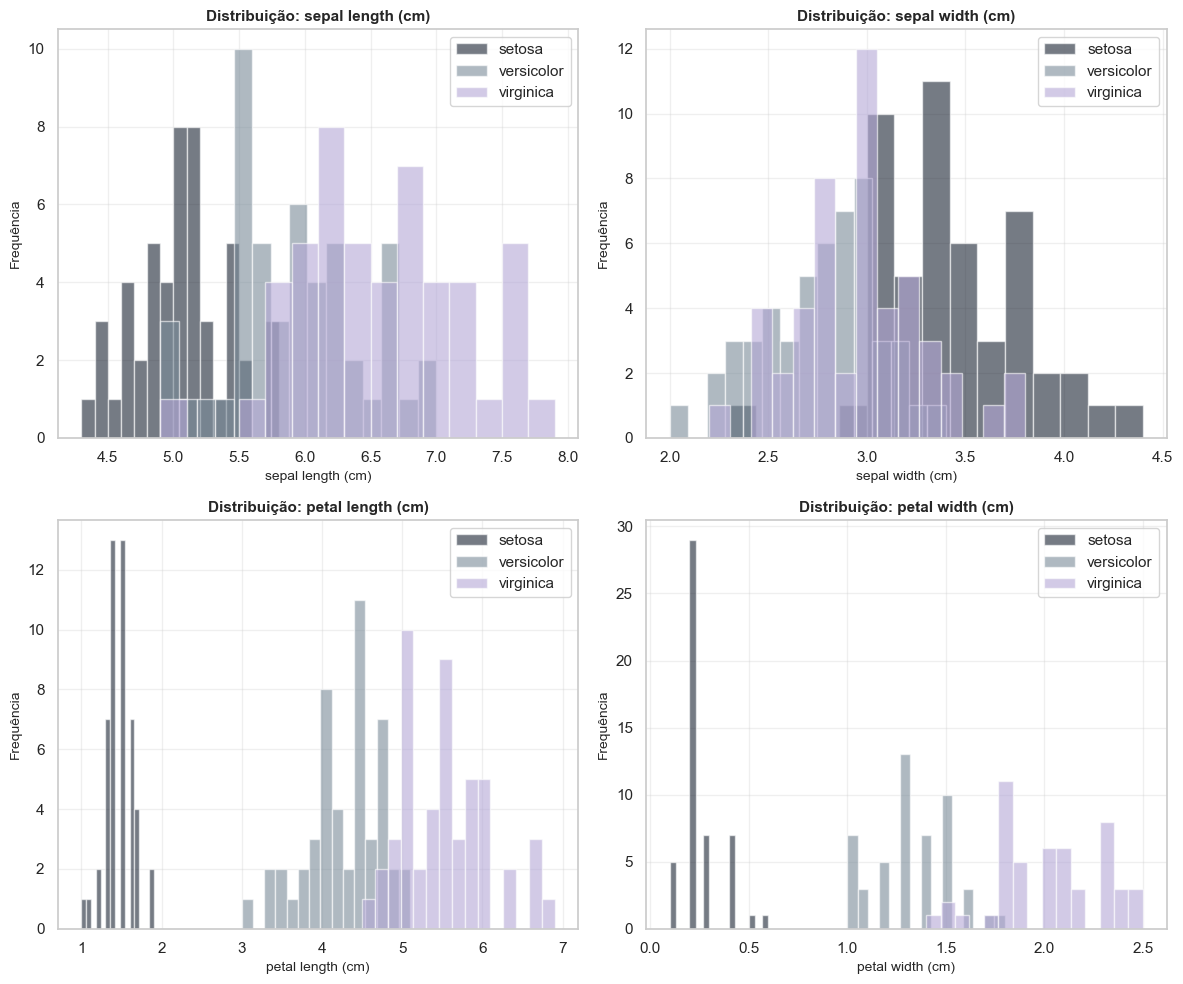


As features mostram boa separação entre as espécies


In [70]:
# Visualizar distribuição das features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(X.columns):
    for i, species in enumerate(species_map.values()):
        data_species = X[y_names == species][col]
        axes[idx].hist(data_species, alpha=0.6, label=species,
                       bins=15, color=plot_colors[i])

    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequência', fontsize=10)
    axes[idx].set_title(f'Distribuição: {col}', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAs features mostram boa separação entre as espécies")

---
### Preparação dos Dados

Dividir em treino e teste

In [71]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("DIVISÃO DOS DADOS")
print("="*70)
print(f"Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribuição no treino:")
print(pd.Series(y_train).map(species_map).value_counts())
print(f"\nDistribuição no teste:")
print(pd.Series(y_test).map(species_map).value_counts())

DIVISÃO DOS DADOS
Treino: 105 amostras (70.0%)
Teste: 45 amostras (30.0%)

Distribuição no treino:
species
versicolor    35
setosa        35
virginica     35
Name: count, dtype: int64

Distribuição no teste:
species
virginica     15
versicolor    15
setosa        15
Name: count, dtype: int64


---
### Treinamento do Modelo

#### Modelo 1: Decision Tree com Entropia

In [72]:
# Criar modelo usando entropia (Information Gain)
dt_entropy = DecisionTreeClassifier(
    criterion='entropy',      # Usa Information Gain
    max_depth=3,             # Profundidade máxima
    min_samples_split=2,     # Mínimo de amostras para dividir
    min_samples_leaf=1,      # Mínimo de amostras nas folhas
    random_state=42
)

# Treinar
dt_entropy.fit(X_train, y_train)

# Predições
y_pred_entropy = dt_entropy.predict(X_test)

# Acurácia
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("MODELO 1: Decision Tree com Entropia")
print("="*70)
print(
    f"Acurácia no conjunto de teste: {accuracy_entropy:.4f} ({accuracy_entropy*100:.2f}%)")
print(f"Profundidade da árvore: {dt_entropy.get_depth()}")
print(f"Número de folhas: {dt_entropy.get_n_leaves()}")

MODELO 1: Decision Tree com Entropia
Acurácia no conjunto de teste: 0.9333 (93.33%)
Profundidade da árvore: 3
Número de folhas: 5


#### Modelo 2: Decision Tree com Gini

In [73]:
# Criar modelo usando Gini
dt_gini = DecisionTreeClassifier(
    criterion='gini',        # Usa Gini Impurity
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Treinar
dt_gini.fit(X_train, y_train)

# Predições
y_pred_gini = dt_gini.predict(X_test)

# Acurácia
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print("\nMODELO 2: Decision Tree com Gini")
print("="*70)
print(
    f"Acurácia no conjunto de teste: {accuracy_gini:.4f} ({accuracy_gini*100:.2f}%)")
print(f"Profundidade da árvore: {dt_gini.get_depth()}")
print(f"Número de folhas: {dt_gini.get_n_leaves()}")


MODELO 2: Decision Tree com Gini
Acurácia no conjunto de teste: 0.9778 (97.78%)
Profundidade da árvore: 3
Número de folhas: 5


### Comparação dos Modelos


COMPARAÇÃO: Entropy vs Gini
         Métrica  Entropy     Gini
        Acurácia 0.933333 0.977778
    Profundidade 3.000000 3.000000
Número de Folhas 5.000000 5.000000


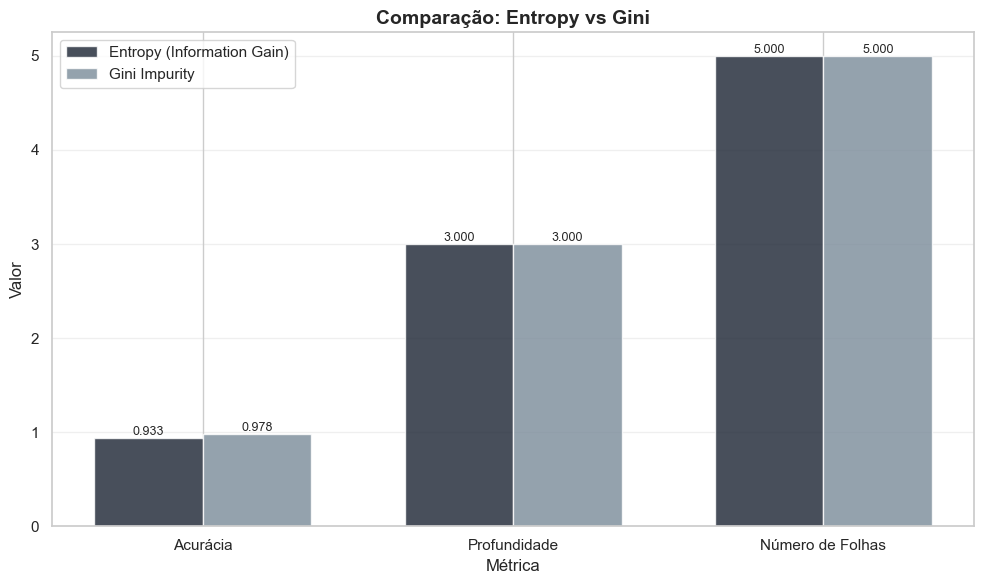

In [74]:
# Comparar modelos
print("\nCOMPARAÇÃO: Entropy vs Gini")
print("="*70)

comparison_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Profundidade', 'Número de Folhas'],
    'Entropy': [accuracy_entropy, dt_entropy.get_depth(), dt_entropy.get_n_leaves()],
    'Gini': [accuracy_gini, dt_gini.get_depth(), dt_gini.get_n_leaves()]
})

print(comparison_df.to_string(index=False))

# Visualizar comparação
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Entropy'], width,
               label='Entropy (Information Gain)', color='#1A2332', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df['Gini'], width,
               label='Gini Impurity', color='#7A8B99', alpha=0.8)

ax.set_xlabel('Métrica', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Comparação: Entropy vs Gini', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Métrica'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

---
### Visualização da Árvore de Decisão

#### Método 1: Visualização Completa

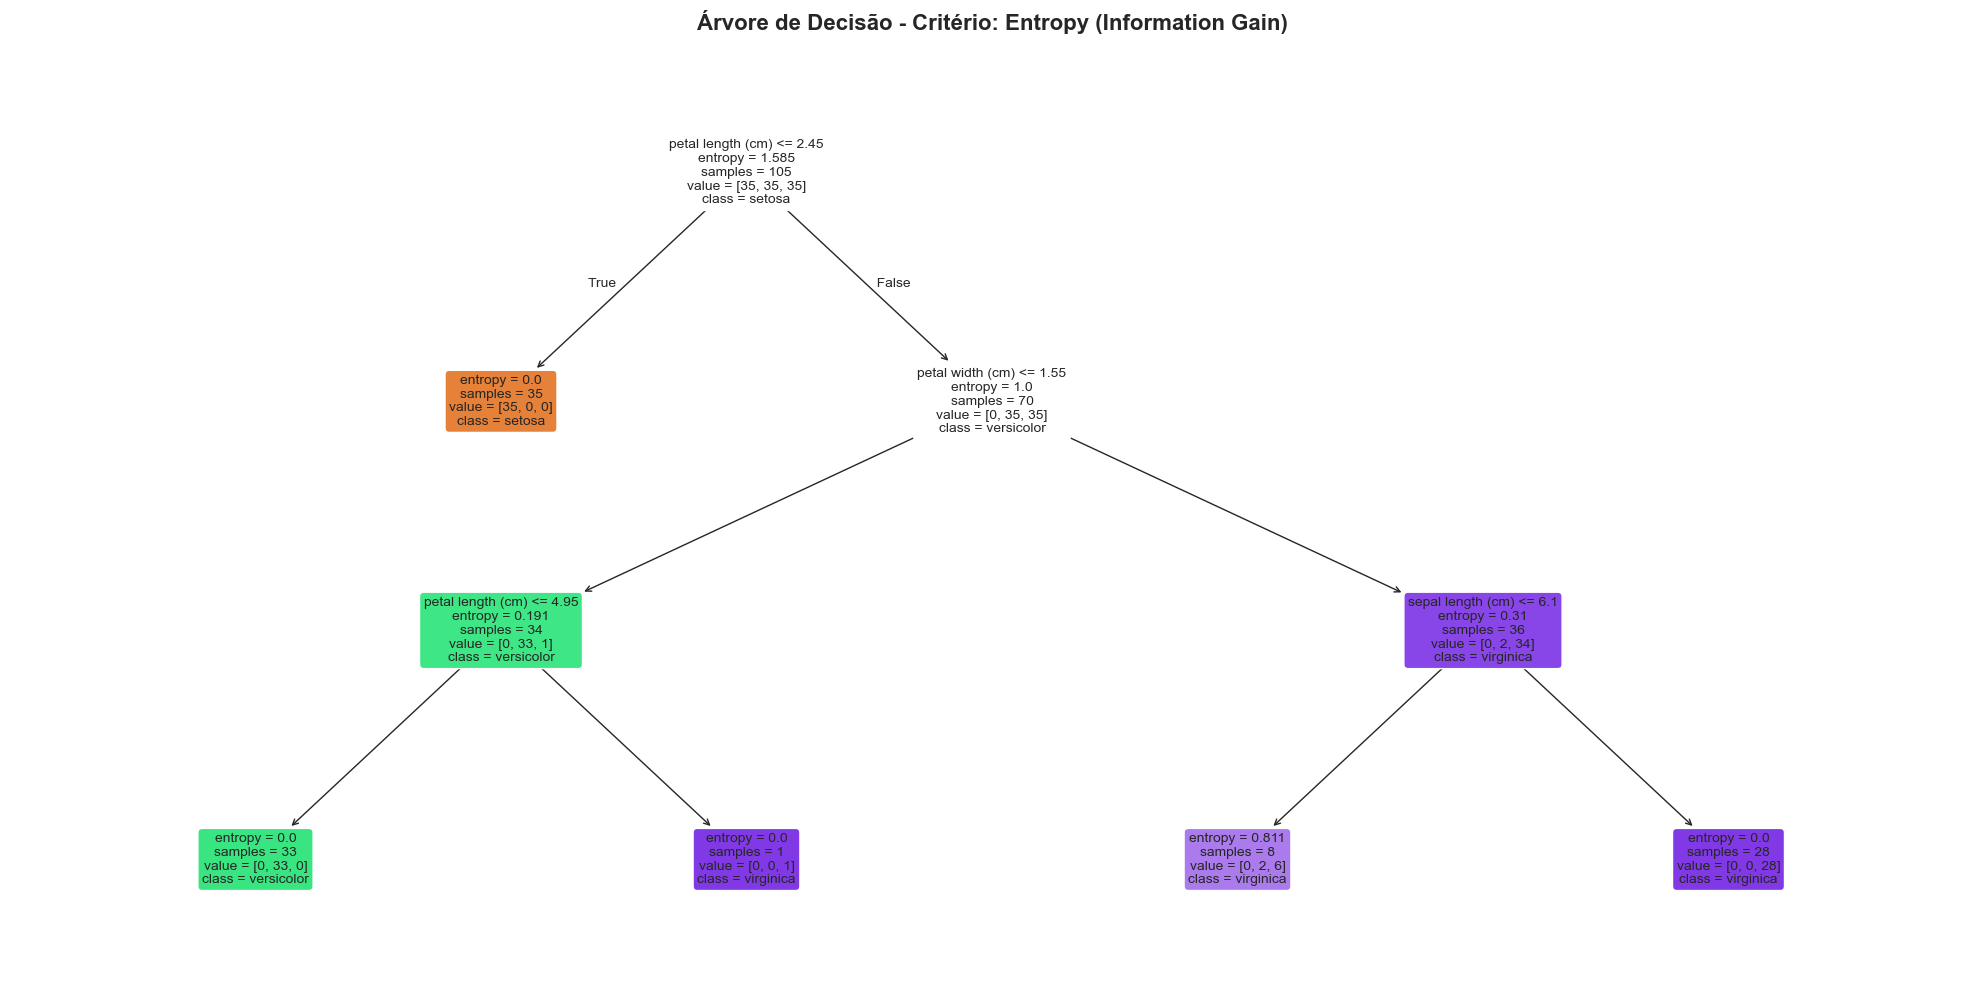


Cada nó mostra:
- Condição de divisão
- Entropy do nó
- Número de amostras
- Distribuição de classes
- Classe majoritária


In [75]:
# Visualizar árvore com entropy
fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(dt_entropy,
          feature_names=X.columns,
          class_names=list(species_map.values()),
          filled=True,
          rounded=True,
          fontsize=10,
          ax=ax)

ax.set_title('Árvore de Decisão - Critério: Entropy (Information Gain)',
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\nCada nó mostra:")
print("- Condição de divisão")
print("- Entropy do nó")
print("- Número de amostras")
print("- Distribuição de classes")
print("- Classe majoritária")

#### Método 2: Visualização Compacta com Profundidade Limitada

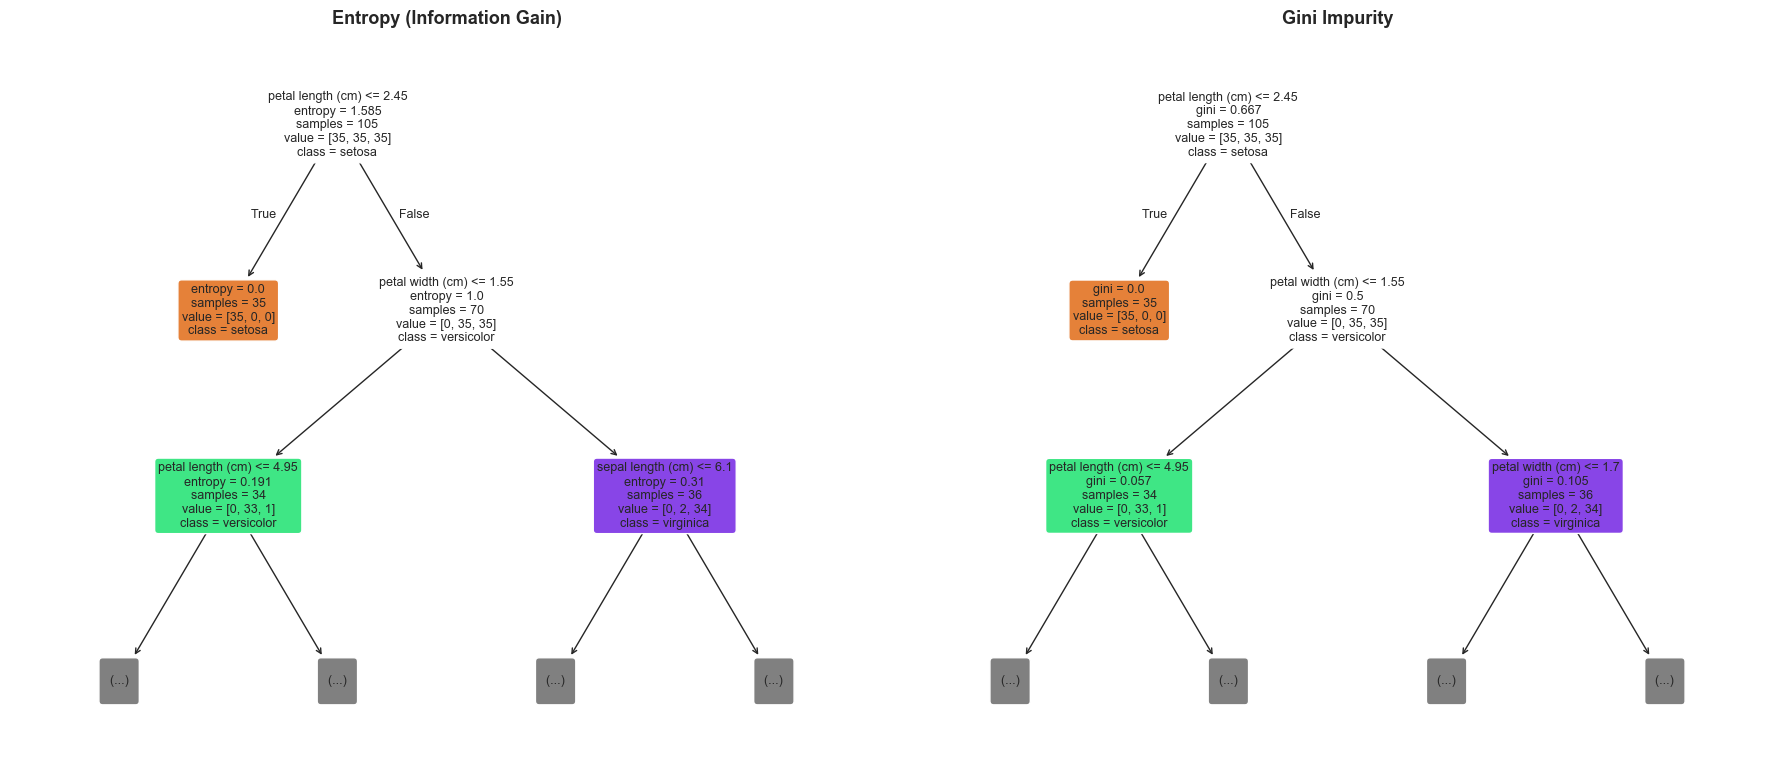

In [76]:
# Visualizar apenas 2 níveis
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Entropy
plot_tree(dt_entropy,
          feature_names=X.columns,
          class_names=list(species_map.values()),
          filled=True,
          rounded=True,
          fontsize=9,
          max_depth=2,
          ax=axes[0])
axes[0].set_title('Entropy (Information Gain)', fontsize=13, fontweight='bold')

# Gini
plot_tree(dt_gini,
          feature_names=X.columns,
          class_names=list(species_map.values()),
          filled=True,
          rounded=True,
          fontsize=9,
          max_depth=2,
          ax=axes[1])
axes[1].set_title('Gini Impurity', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

---
### Feature Importance

Importância de cada feature segundo o modelo

IMPORTÂNCIA DAS FEATURES
          Feature  Entropy     Gini
petal length (cm) 0.643589 0.550877
 petal width (cm) 0.327315 0.449123
sepal length (cm) 0.029096 0.000000
 sepal width (cm) 0.000000 0.000000


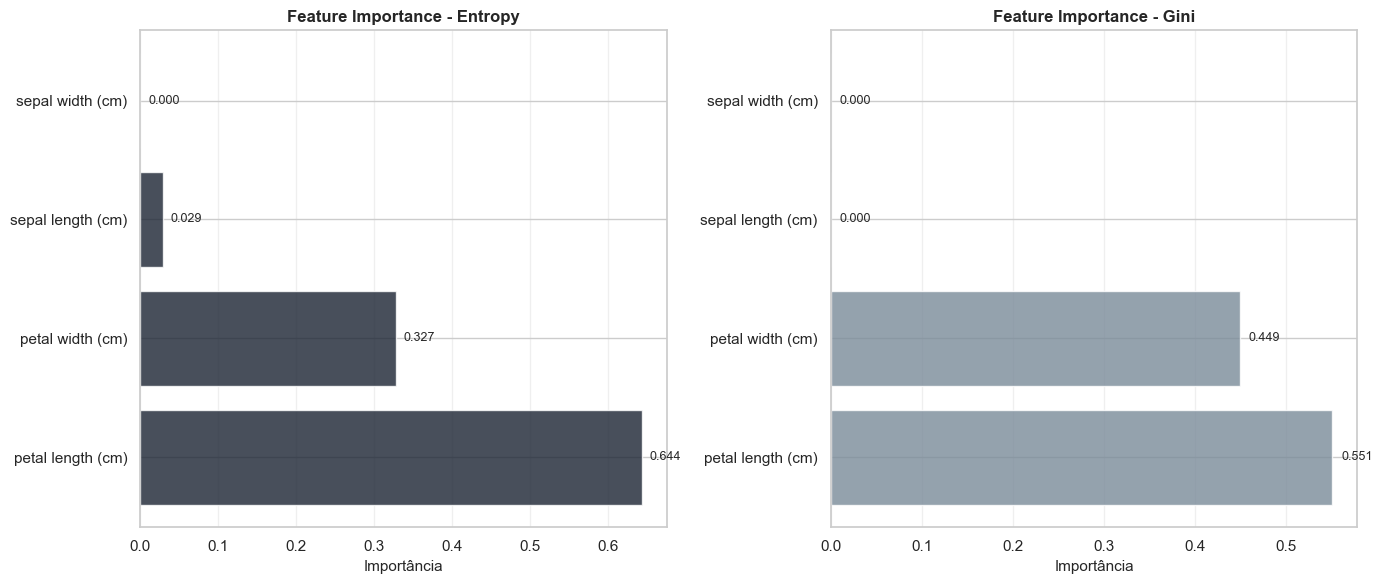


Interpretação:
A feature mais importante segundo Entropy: petal length (cm)
A feature mais importante segundo Gini: petal length (cm)


In [77]:
# Extrair importâncias
feature_importance_entropy = dt_entropy.feature_importances_
feature_importance_gini = dt_gini.feature_importances_

# Criar DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Entropy': feature_importance_entropy,
    'Gini': feature_importance_gini
}).sort_values('Entropy', ascending=False)

print("IMPORTÂNCIA DAS FEATURES")
print("="*70)
print(importance_df.to_string(index=False))

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Entropy
axes[0].barh(importance_df['Feature'], importance_df['Entropy'],
             color='#1A2332', alpha=0.8)
axes[0].set_xlabel('Importância', fontsize=11)
axes[0].set_title('Feature Importance - Entropy',
                  fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Adicionar valores
for i, v in enumerate(importance_df['Entropy']):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

# Gini
axes[1].barh(importance_df['Feature'], importance_df['Gini'],
             color='#7A8B99', alpha=0.8)
axes[1].set_xlabel('Importância', fontsize=11)
axes[1].set_title('Feature Importance - Gini', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Adicionar valores
for i, v in enumerate(importance_df['Gini']):
    axes[1].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nInterpretação:")
print(
    f"A feature mais importante segundo Entropy: {importance_df.iloc[0]['Feature']}")
print(
    f"A feature mais importante segundo Gini: {importance_df.iloc[0]['Feature']}")

---
### Matriz de Confusão

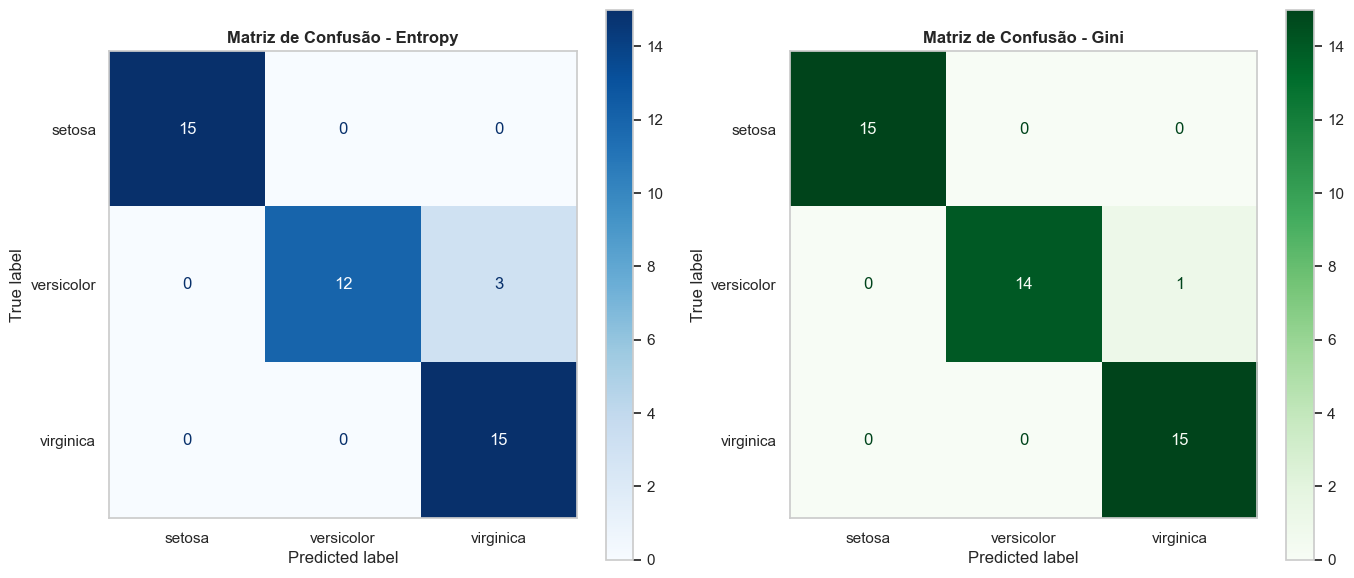


MATRIZ DE CONFUSÃO - ENTROPY
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]

MATRIZ DE CONFUSÃO - GINI
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [78]:
# Calcular matrizes de confusão
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Entropy
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_entropy,
                               display_labels=list(species_map.values()))
disp1.plot(ax=axes[0], cmap='Blues', colorbar=True)
axes[0].set_title('Matriz de Confusão - Entropy',
                  fontsize=12, fontweight='bold')
axes[0].grid(False)

# Gini
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_gini,
                               display_labels=list(species_map.values()))
disp2.plot(ax=axes[1], cmap='Greens', colorbar=True)
axes[1].set_title('Matriz de Confusão - Gini', fontsize=12, fontweight='bold')
axes[1].grid(False)

plt.tight_layout()
plt.show()

print("\nMATRIZ DE CONFUSÃO - ENTROPY")
print("="*70)
print(cm_entropy)
print("\nMATRIZ DE CONFUSÃO - GINI")
print("="*70)
print(cm_gini)

---
### Classification Report

In [79]:
# Reports detalhados
print("\nCLASSIFICATION REPORT - ENTROPY")
print("="*70)
print(classification_report(y_test, y_pred_entropy,
                            target_names=list(species_map.values())))

print("\nCLASSIFICATION REPORT - GINI")
print("="*70)
print(classification_report(y_test, y_pred_gini,
                            target_names=list(species_map.values())))


CLASSIFICATION REPORT - ENTROPY
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


CLASSIFICATION REPORT - GINI
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



---
### Cross-Validation

Validar modelo com K-Fold Cross-Validation

CROSS-VALIDATION (5 FOLDS)

Entropy:
  Scores por fold: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
  Média: 0.9600
  Desvio padrão: 0.0249

Gini:
  Scores por fold: [0.96666667 0.96666667 0.93333333 1.         1.        ]
  Média: 0.9733
  Desvio padrão: 0.0249


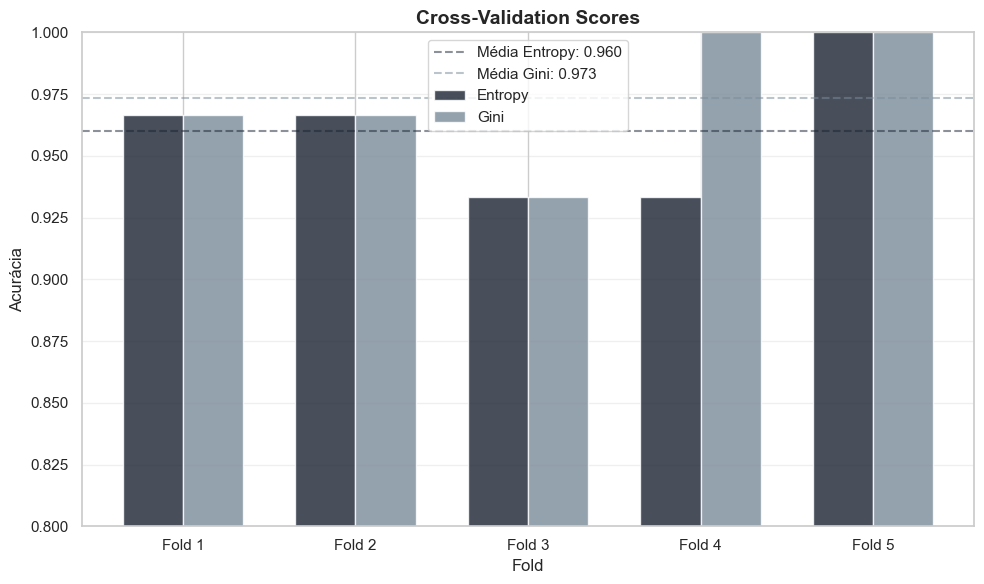

In [80]:
# Cross-validation com 5 folds
cv_scores_entropy = cross_val_score(dt_entropy, X, y, cv=5, scoring='accuracy')
cv_scores_gini = cross_val_score(dt_gini, X, y, cv=5, scoring='accuracy')

print("CROSS-VALIDATION (5 FOLDS)")
print("="*70)
print("\nEntropy:")
print(f"  Scores por fold: {cv_scores_entropy}")
print(f"  Média: {cv_scores_entropy.mean():.4f}")
print(f"  Desvio padrão: {cv_scores_entropy.std():.4f}")

print("\nGini:")
print(f"  Scores por fold: {cv_scores_gini}")
print(f"  Média: {cv_scores_gini.mean():.4f}")
print(f"  Desvio padrão: {cv_scores_gini.std():.4f}")

# Visualizar
fig, ax = plt.subplots(figsize=(10, 6))

x_pos = np.arange(5)
width = 0.35

bars1 = ax.bar(x_pos - width/2, cv_scores_entropy, width,
               label='Entropy', color='#1A2332', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, cv_scores_gini, width,
               label='Gini', color='#7A8B99', alpha=0.8)

# Adicionar linhas de média
ax.axhline(cv_scores_entropy.mean(), color='#1A2332',
           linestyle='--', alpha=0.5, label=f'Média Entropy: {cv_scores_entropy.mean():.3f}')
ax.axhline(cv_scores_gini.mean(), color='#7A8B99',
           linestyle='--', alpha=0.5, label=f'Média Gini: {cv_scores_gini.mean():.3f}')

ax.set_xlabel('Fold', fontsize=12)
ax.set_ylabel('Acurácia', fontsize=12)
ax.set_title('Cross-Validation Scores', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'Fold {i+1}' for i in range(5)])
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.8, 1.0])

plt.tight_layout()
plt.show()

---
### Análise de Profundidade

Como a profundidade da árvore afeta o desempenho

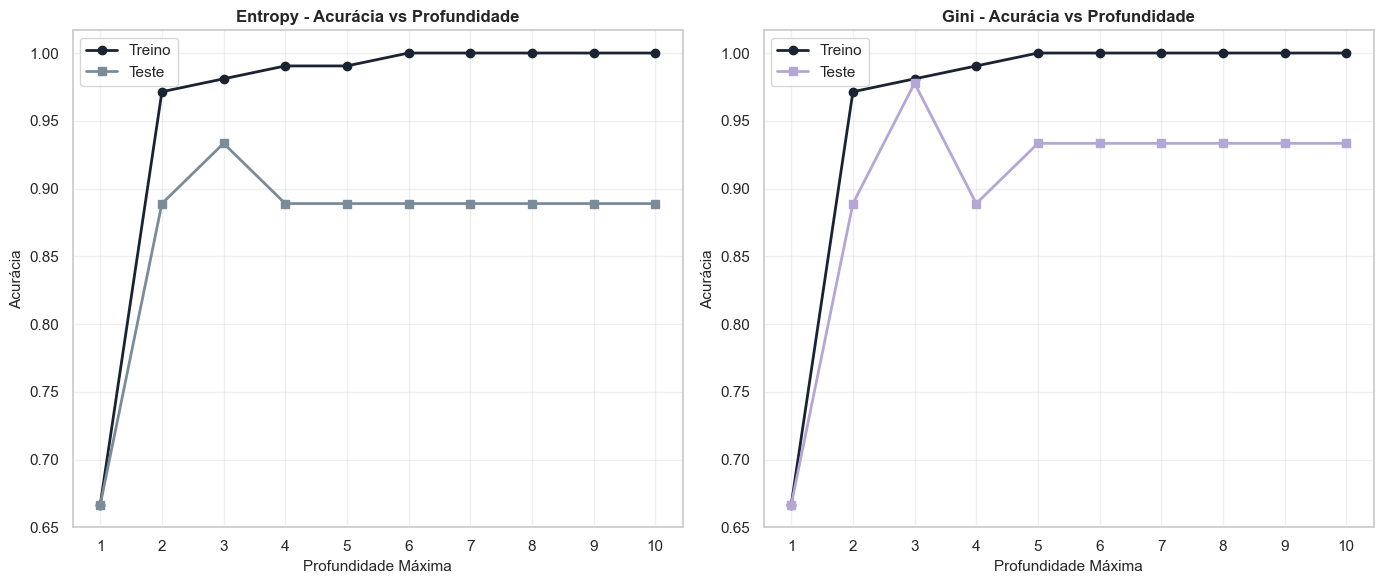


ANÁLISE DE PROFUNDIDADE

Observações:
- Treino: acurácia aumenta com profundidade (pode overfittar)
- Teste: acurácia estabiliza ou cai (sinal de overfitting)
- Profundidade ótima para Entropy: 3
- Profundidade ótima para Gini: 3


In [81]:
# Testar diferentes profundidades
max_depths = range(1, 11)
train_scores_entropy = []
test_scores_entropy = []
train_scores_gini = []
test_scores_gini = []

for depth in max_depths:
    # Entropy
    dt_e = DecisionTreeClassifier(
        criterion='entropy', max_depth=depth, random_state=42)
    dt_e.fit(X_train, y_train)
    train_scores_entropy.append(dt_e.score(X_train, y_train))
    test_scores_entropy.append(dt_e.score(X_test, y_test))

    # Gini
    dt_g = DecisionTreeClassifier(
        criterion='gini', max_depth=depth, random_state=42)
    dt_g.fit(X_train, y_train)
    train_scores_gini.append(dt_g.score(X_train, y_train))
    test_scores_gini.append(dt_g.score(X_test, y_test))

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Entropy
axes[0].plot(max_depths, train_scores_entropy, marker='o',
             label='Treino', color='#1A2332', linewidth=2)
axes[0].plot(max_depths, test_scores_entropy, marker='s',
             label='Teste', color='#7A8B99', linewidth=2)
axes[0].set_xlabel('Profundidade Máxima', fontsize=11)
axes[0].set_ylabel('Acurácia', fontsize=11)
axes[0].set_title('Entropy - Acurácia vs Profundidade',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].set_xticks(max_depths)

# Gini
axes[1].plot(max_depths, train_scores_gini, marker='o',
             label='Treino', color='#1A2332', linewidth=2)
axes[1].plot(max_depths, test_scores_gini, marker='s',
             label='Teste', color='#B4A7D6', linewidth=2)
axes[1].set_xlabel('Profundidade Máxima', fontsize=11)
axes[1].set_ylabel('Acurácia', fontsize=11)
axes[1].set_title('Gini - Acurácia vs Profundidade',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_xticks(max_depths)

plt.tight_layout()
plt.show()

print("\nANÁLISE DE PROFUNDIDADE")
print("="*70)
print("\nObservações:")
print("- Treino: acurácia aumenta com profundidade (pode overfittar)")
print("- Teste: acurácia estabiliza ou cai (sinal de overfitting)")
print(
    f"- Profundidade ótima para Entropy: {max_depths[np.argmax(test_scores_entropy)]}")
print(
    f"- Profundidade ótima para Gini: {max_depths[np.argmax(test_scores_gini)]}")

---
### Predições em Novos Dados

In [82]:
# Criar novos exemplos
new_data = pd.DataFrame({
    'sepal length (cm)': [5.1, 6.5, 7.0],
    'sepal width (cm)': [3.5, 3.0, 3.2],
    'petal length (cm)': [1.4, 5.5, 4.7],
    'petal width (cm)': [0.2, 1.8, 1.4]
})

print("PREDIÇÕES EM NOVOS DADOS")
print("="*70)
print("\nNovos dados:")
print(new_data)

# Fazer predições
predictions_entropy = dt_entropy.predict(new_data)
predictions_gini = dt_gini.predict(new_data)

# Probabilidades
proba_entropy = dt_entropy.predict_proba(new_data)
proba_gini = dt_gini.predict_proba(new_data)

print("\nPredições - Entropy:")
for i, pred in enumerate(predictions_entropy):
    species = species_map[pred]
    print(f"  Exemplo {i+1}: {species}")
    print(f"    Probabilidades: setosa={proba_entropy[i][0]:.3f}, "
          f"versicolor={proba_entropy[i][1]:.3f}, virginica={proba_entropy[i][2]:.3f}")

print("\nPredições - Gini:")
for i, pred in enumerate(predictions_gini):
    species = species_map[pred]
    print(f"  Exemplo {i+1}: {species}")
    print(f"    Probabilidades: setosa={proba_gini[i][0]:.3f}, "
          f"versicolor={proba_gini[i][1]:.3f}, virginica={proba_gini[i][2]:.3f}")

PREDIÇÕES EM NOVOS DADOS

Novos dados:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                6.5               3.0                5.5               1.8
2                7.0               3.2                4.7               1.4

Predições - Entropy:
  Exemplo 1: setosa
    Probabilidades: setosa=1.000, versicolor=0.000, virginica=0.000
  Exemplo 2: virginica
    Probabilidades: setosa=0.000, versicolor=0.000, virginica=1.000
  Exemplo 3: versicolor
    Probabilidades: setosa=0.000, versicolor=1.000, virginica=0.000

Predições - Gini:
  Exemplo 1: setosa
    Probabilidades: setosa=1.000, versicolor=0.000, virginica=0.000
  Exemplo 2: virginica
    Probabilidades: setosa=0.000, versicolor=0.029, virginica=0.971
  Exemplo 3: versicolor
    Probabilidades: setosa=0.000, versicolor=1.000, virginica=0.000


---
### Exportar Árvore como Texto

Visualizar a estrutura da árvore em formato de texto

In [83]:
from sklearn.tree import export_text

# Exportar árvore como texto
tree_rules = export_text(dt_entropy, feature_names=list(X.columns))

print("REGRAS DA ÁRVORE DE DECISÃO (ENTROPY)")
print("="*70)
print(tree_rules)

print("\nInterpretação:")
print("- Cada linha representa uma condição de decisão")
print("- '|---' indica o nível na árvore")
print("- 'class:' indica a classificação final naquela folha")
print("- Números entre [] indicam a distribuição de amostras por classe")

REGRAS DA ÁRVORE DE DECISÃO (ENTROPY)
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.55
|   |   |--- sepal length (cm) <= 6.10
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  6.10
|   |   |   |--- class: 2


Interpretação:
- Cada linha representa uma condição de decisão
- '|---' indica o nível na árvore
- 'class:' indica a classificação final naquela folha
- Números entre [] indicam a distribuição de amostras por classe


---
### Parâmetros Importantes do DecisionTreeClassifier

#### Principais Hiperparâmetros

**criterion**: Função para medir qualidade da divisão
- 'entropy': usa Information Gain
- 'gini': usa Gini Impurity

**max_depth**: Profundidade máxima da árvore
- Controla complexidade do modelo
- Valores muito altos: overfitting
- Valores muito baixos: underfitting

**min_samples_split**: Mínimo de amostras para dividir um nó
- Valores maiores: árvore mais simples
- Valores menores: árvore mais complexa

**min_samples_leaf**: Mínimo de amostras em uma folha
- Restringe criação de folhas muito pequenas
- Ajuda a prevenir overfitting

**max_features**: Número máximo de features consideradas em cada divisão
- 'auto' ou 'sqrt': raiz quadrada do número de features
- 'log2': log2 do número de features
- None: considera todas as features

In [84]:
# Demonstrar impacto dos parâmetros
print("IMPACTO DOS HIPERPARÂMETROS")
print("="*70)

configs = [
    {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 5},
]

results_comparison = []

for i, config in enumerate(configs, 1):
    dt = DecisionTreeClassifier(criterion='entropy', random_state=42, **config)
    dt.fit(X_train, y_train)
    train_acc = dt.score(X_train, y_train)
    test_acc = dt.score(X_test, y_test)

    results_comparison.append({
        'Configuração': i,
        'max_depth': config['max_depth'],
        'min_samples_split': config['min_samples_split'],
        'min_samples_leaf': config['min_samples_leaf'],
        'Profundidade Real': dt.get_depth(),
        'Número de Folhas': dt.get_n_leaves(),
        'Acurácia Treino': train_acc,
        'Acurácia Teste': test_acc
    })

comparison_df = pd.DataFrame(results_comparison)
print(comparison_df.to_string(index=False))

print("\nConclusões:")
print("- Config 1: Modelo simples, pode ter underfitting")
print("- Config 2: Balanço razoável")
print("- Config 3: Modelo restrito, previne overfitting")

IMPACTO DOS HIPERPARÂMETROS
 Configuração  max_depth  min_samples_split  min_samples_leaf  Profundidade Real  Número de Folhas  Acurácia Treino  Acurácia Teste
            1        2.0                  2                 1                  2                 3         0.971429        0.888889
            2        5.0                  2                 1                  5                 7         0.990476        0.888889
            3        NaN                 10                 5                  3                 5         0.971429        0.888889

Conclusões:
- Config 1: Modelo simples, pode ter underfitting
- Config 2: Balanço razoável
- Config 3: Modelo restrito, previne overfitting


---
### Resumo do Bonus

#### O que aprendemos

1. **Implementação Prática**: Como usar DecisionTreeClassifier do Scikit-Learn
2. **Comparação**: Entropy vs Gini na prática
3. **Visualização**: Múltiplas formas de visualizar árvores
4. **Avaliação**: Métricas completas de desempenho
5. **Feature Importance**: Identificar features mais relevantes
6. **Cross-Validation**: Validação robusta do modelo
7. **Hiperparâmetros**: Impacto dos parâmetros no desempenho
8. **Predições**: Como usar o modelo treinado

#### Boas Práticas

1. Sempre dividir dados em treino/teste
2. Usar cross-validation para validação robusta
3. Analisar feature importance para entender o modelo
4. Visualizar a árvore para interpretabilidade
5. Testar diferentes profundidades para evitar overfitting
6. Comparar diferentes critérios (entropy vs gini)
7. Monitorar diferença entre acurácia de treino e teste

#### Próximos Passos

- Experimentar com Random Forests (ensemble de árvores)
- Testar Gradient Boosting (XGBoost, LightGBM)
- Aplicar em problemas de negócio reais
- Explorar técnicas de poda de árvore
- Estudar interpretabilidade de modelos